ペルソナを固定して%のみ変える

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

In [51]:
def plot_both(ax,data_name,plot_type,colors,t,skiptime):
    #both
    attr_auc = []
    attr_nll = []
    edge_auc = []
    edge_nll = []

    attempt = 0

    path = "../experiment_data/imcomplete/{}/t={}/both/attempt={}".format(data_name,skiptime,attempt)

    attr_auc_path = path + "/proposed_attr_auc.npy"
    attr_nll_path = path + "/proposed_attr_nll.npy"
    edge_auc_path = path + "/proposed_edge_auc.npy"
    edge_nll_path = path + "/proposed_edge_nll.npy"



            

    attr_auc.append(np.load(attr_auc_path))
    attr_nll.append(np.load(attr_nll_path))
    edge_auc.append( np.load(edge_auc_path))
    edge_nll.append(np.load(edge_nll_path))

    attr_mean = np.mean(attr_auc,axis=1)
    attr_max = np.max(attr_auc,axis=1)
    attr_min = np.min(attr_auc,axis=1)
    edge_mean = np.mean(edge_auc,axis=1)
    edge_max = np.max(edge_auc,axis=1)
    edge_min = np.min(edge_auc,axis=1)

    time = [1,2,3,4,5]

    if plot_type == "edge":
        ax.plot(time, edge_mean[0], lw=2, label="both{}".format(skiptime), color=colors[t])
        ax.fill_between(time, edge_min[0], edge_max[0], facecolor=colors[t], alpha=0.1)

    else:
        ax.plot(time, attr_mean[0], lw=2, label="both{}".format(skiptime), color=colors[t])
        ax.fill_between(time, attr_min[0], attr_max[0], facecolor=colors[t], alpha=0.1)





        

In [57]:
def plot_comlete(ax,data_name,plot_type,persona):
    #both

    attr_auc = []
    attr_nll = []
    edge_auc = []
    edge_nll = []



    path = "../experiment_data/complete/{}/persona={}".format(data_name,persona)

    attr_auc_path = path + "/proposed_attr_auc.npy"
    attr_nll_path = path + "/proposed_attr_nll.npy"
    edge_auc_path = path + "/proposed_edge_auc.npy"
    edge_nll_path = path + "/proposed_edge_nll.npy"


    attr_auc.append(np.load(attr_auc_path))
    attr_nll.append(np.load(attr_nll_path))
    edge_auc.append(np.load(edge_auc_path))
    edge_nll.append(np.load(edge_nll_path))

    attr_mean = np.mean(attr_auc,axis=1)
    attr_max = np.max(attr_auc,axis=1)
    attr_min = np.min(attr_auc,axis=1)
    edge_mean = np.mean(edge_auc,axis=1)
    edge_max = np.max(edge_auc,axis=1)
    edge_min = np.min(edge_auc,axis=1)

    time = [1,2,3,4,5]

    if plot_type == "edge":
        ax.plot(time, edge_mean[0], lw=2, label="Persona{}:Cpmplete".format(persona), color="#005AFF")
        ax.fill_between(time, edge_min[0], edge_max[0], facecolor="#005AFF", alpha=0.1)

    else:
        ax.plot(time, attr_mean[0], lw=2, label="Persona{}:Cpmplete".format(persona), color="#005AFF")
        ax.fill_between(time, attr_min[0], attr_max[0], facecolor="#005AFF", alpha=0.1)

In [62]:
def plot_persona(ax,data_name,del_type,plot_type,persona):   
    
    colors =["#FF4B00","#03AF7A","#F6AA00","#FFF100","#000000","#4DC4FF"]



    t=0
    if data_name == "NIPS":
        repeat = 10
    else:
        repeat =1
        
    for percent in [5,15,30,50,75]:
       
        attr_auc = []
        attr_nll = []
        edge_auc = []
        edge_nll = []



        for attempt in range(repeat):

            path = "../experiment_data/imcomplete/{}/t=4/{}/percent={}/attempt={}/persona={}".format(data_name,del_type,percent,attempt,persona)

            attr_auc_path = path + "/proposed_attr_auc.npy"
            attr_nll_path = path + "/proposed_attr_nll.npy"
            edge_auc_path = path + "/proposed_edge_auc.npy"
            edge_nll_path = path + "/proposed_edge_nll.npy"

              

            attr_auc.append(np.load(attr_auc_path))
            attr_nll.append(np.load(attr_nll_path))
            edge_auc.append(np.load(edge_auc_path))
            edge_nll.append(np.load(edge_nll_path))

            attr_mean = np.mean(attr_auc,axis=1)
            attr_max = np.max(attr_auc,axis=1)
            attr_min = np.min(attr_auc,axis=1)
            edge_mean = np.mean(edge_auc,axis=1)
            edge_max = np.max(edge_auc,axis=1)
            edge_min = np.min(edge_auc,axis=1)

        time = [1,2,3,4,5]

        if plot_type == "edge":
            ax.plot(time, edge_mean[0], lw=2, label="percent:"+str(percent), color=colors[t])
            ax.fill_between(time, edge_min[0], edge_max[0], facecolor=colors[t], alpha=0.1)

        else:
            ax.plot(time, attr_mean[0], lw=2, label="percent:"+str(percent), color=colors[t])
            ax.fill_between(time, attr_min[0], attr_max[0], facecolor=colors[t], alpha=0.1)
        
        t += 1

    plot_comlete(ax,data_name,plot_type,persona)

    ax.set_xticks([1,2,3,4,5])
    ax.set_title(r'{} auc Delete:{} [{} Persona:{}]'.format(plot_type,del_type,data_name,persona))
    ax.legend(loc='upper left',bbox_to_anchor=(1, 1))
    ax.set_xlabel('time')
    ax.set_ylabel('accuracy')

In [59]:
def change_percent(data_name,del_type,plot_type):

    if data_name == "NIPS":
        persona_list = [3,5,8,12,16]
    else:
        persona_list = [5,25,50]

    for p in persona_list:

        fig, ax = plt.subplots(1)
        plot_persona(ax,data_name,del_type,plot_type,p)

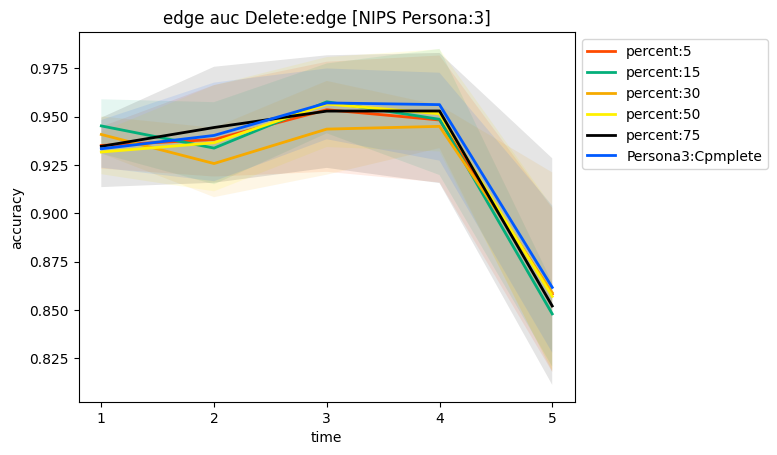

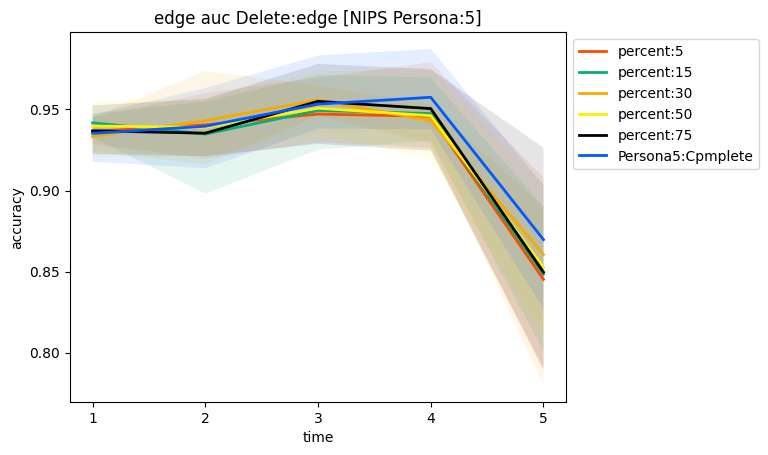

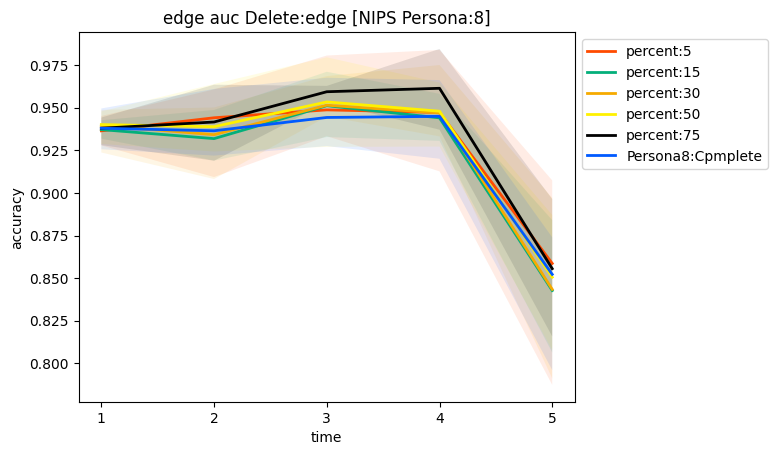

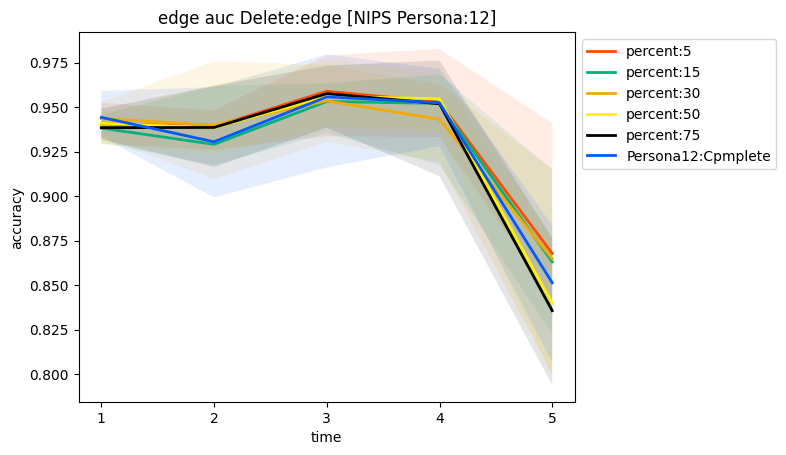

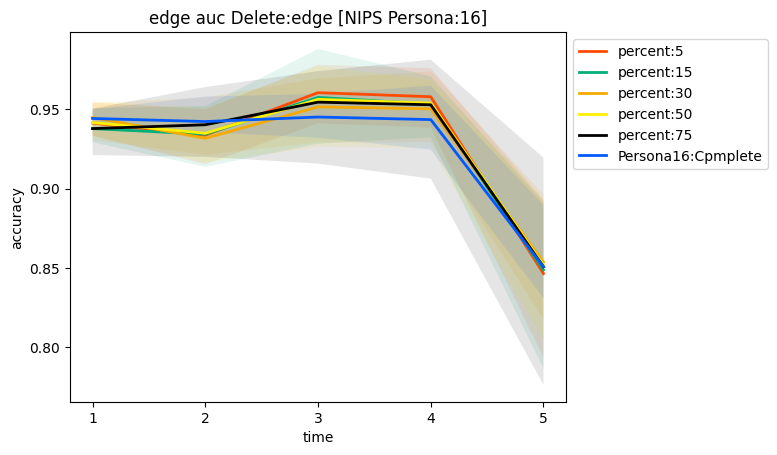

In [63]:
change_percent("NIPS","edge","edge")

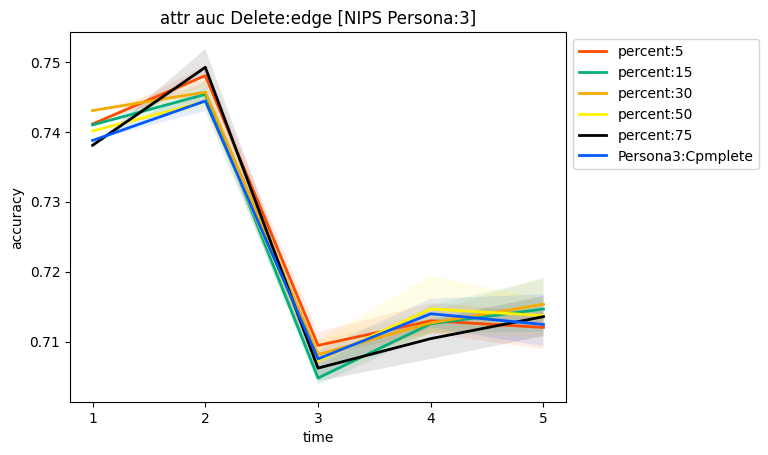

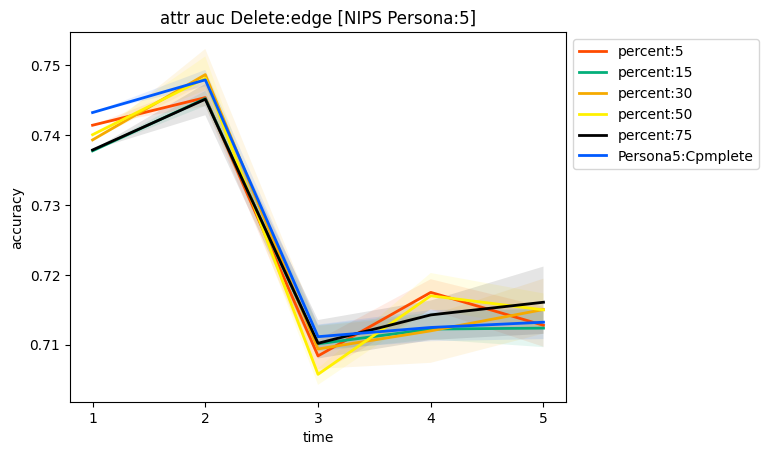

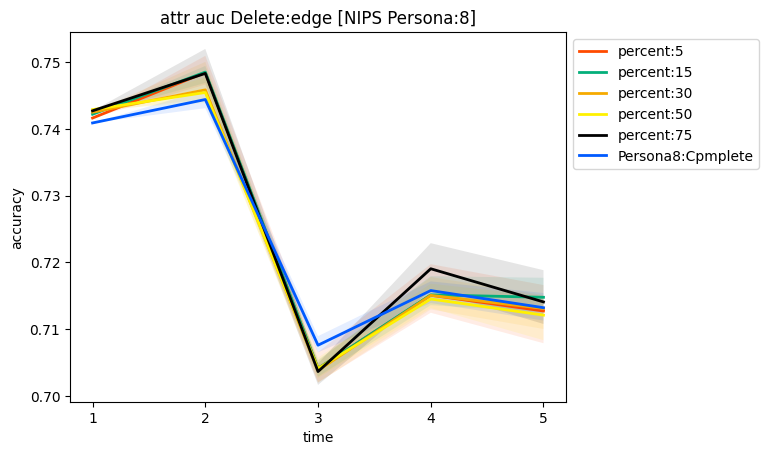

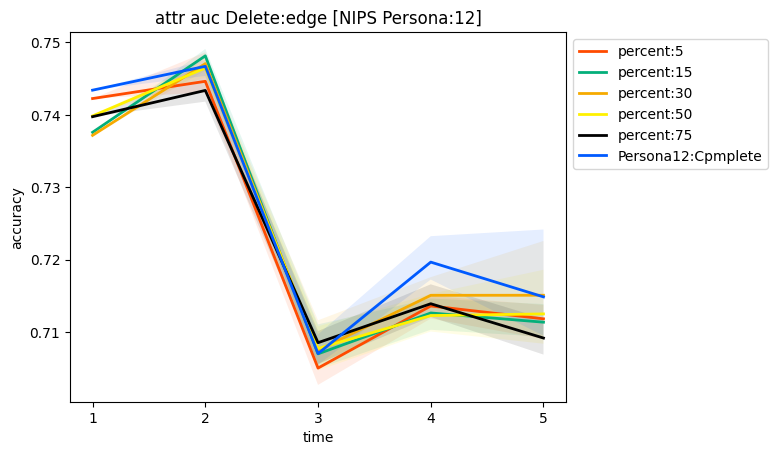

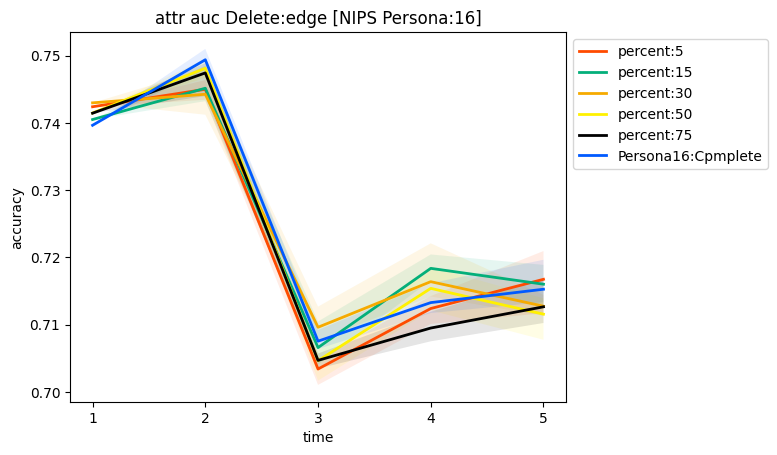

In [64]:
change_percent("NIPS","edge","attr")

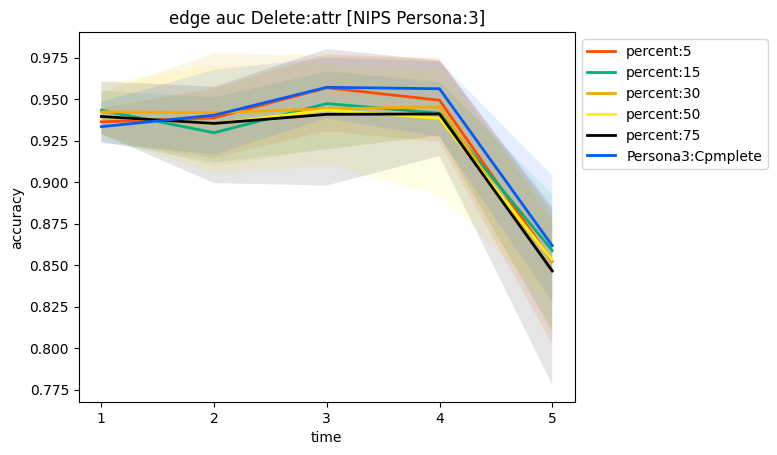

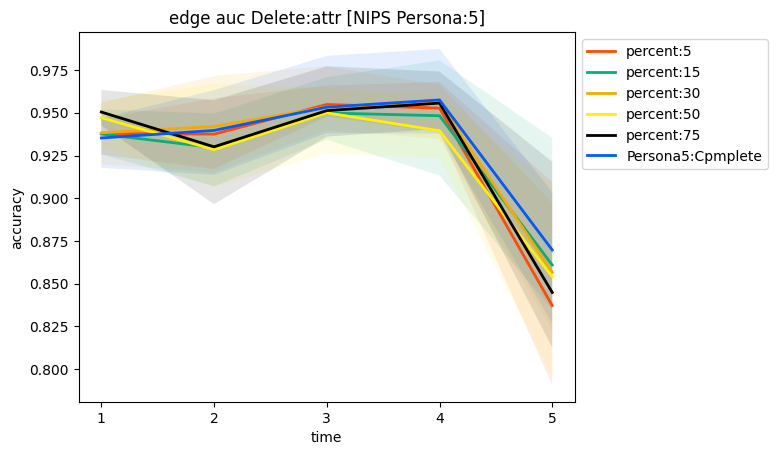

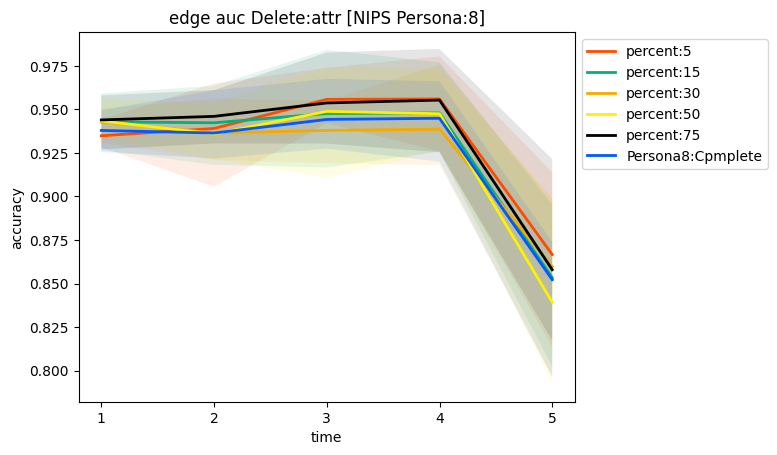

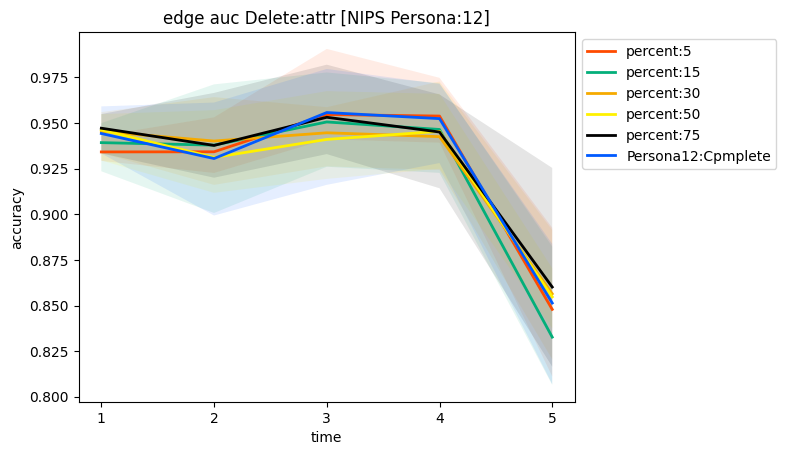

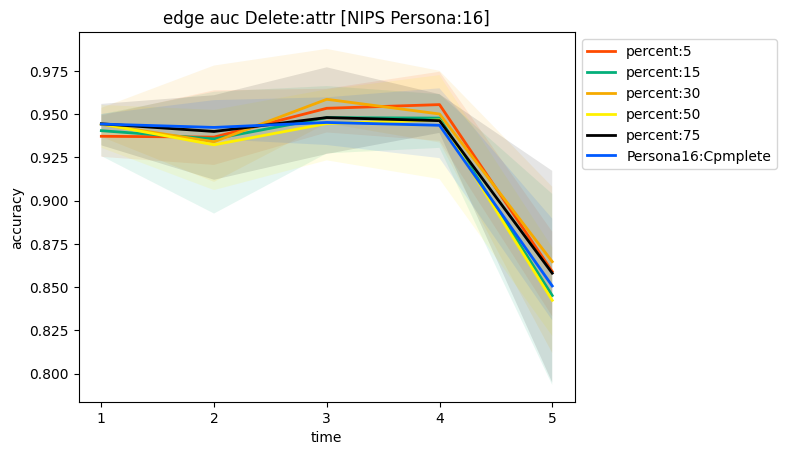

In [65]:
change_percent("NIPS","attr","edge")

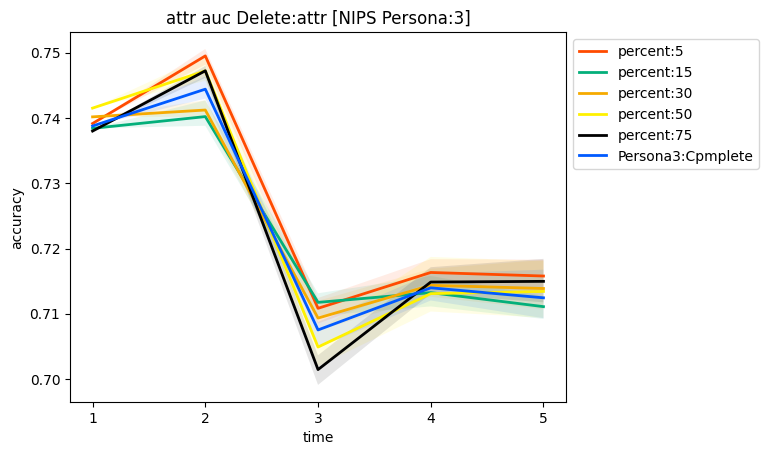

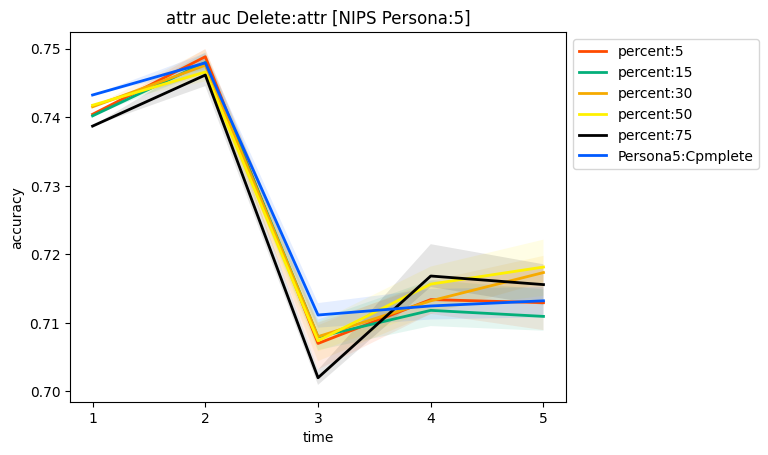

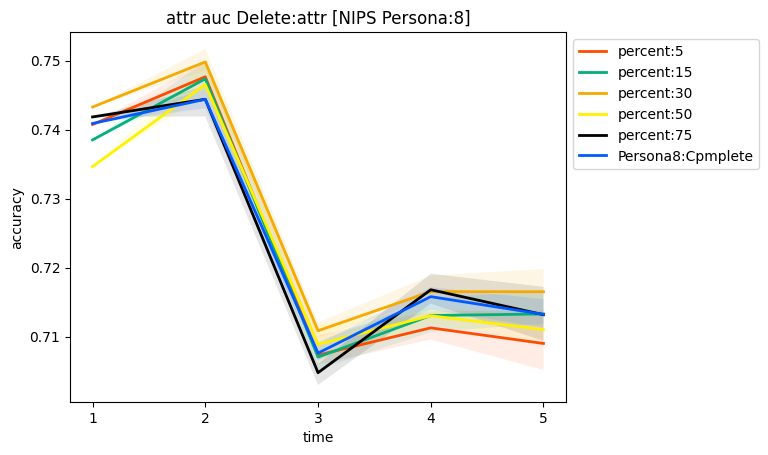

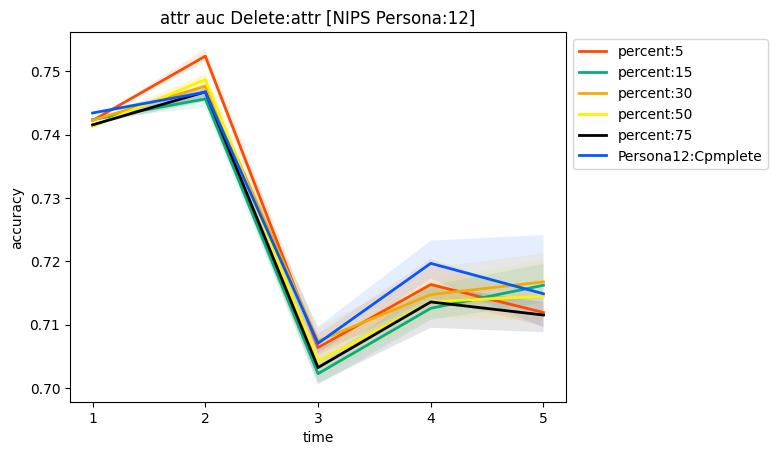

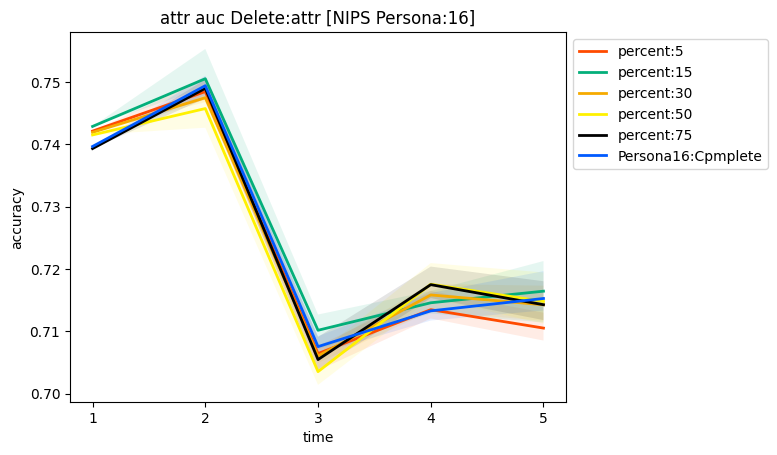

In [66]:
change_percent("NIPS","attr","attr")

In [ ]:
fig, ax = plt.subplots(1)
plot_persona(ax,"NIPS","edge","edge")

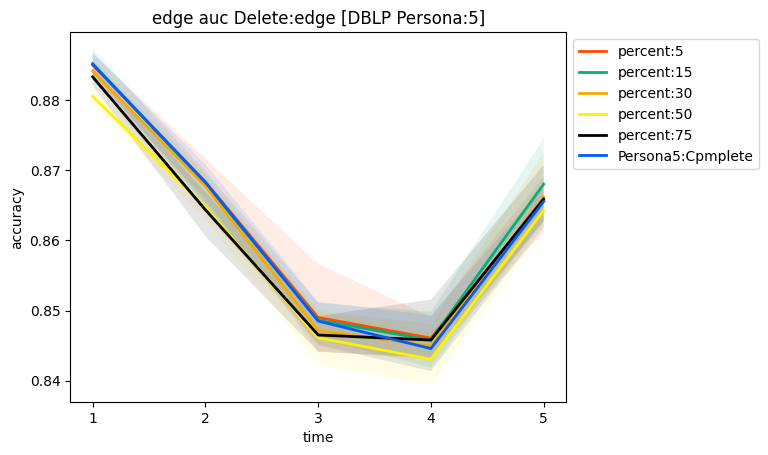

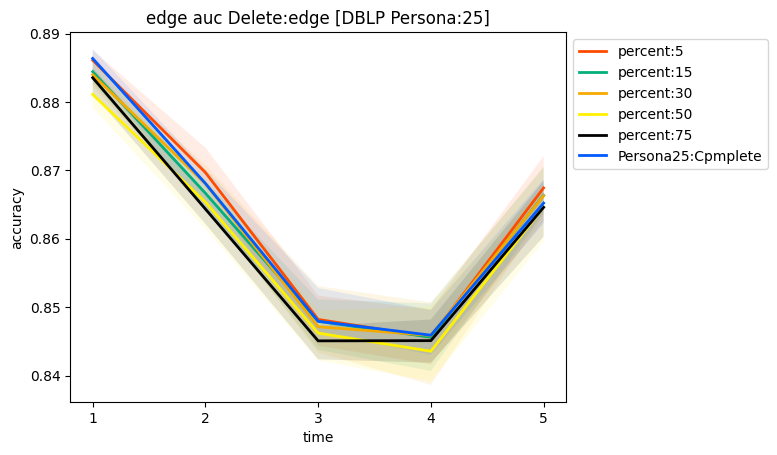

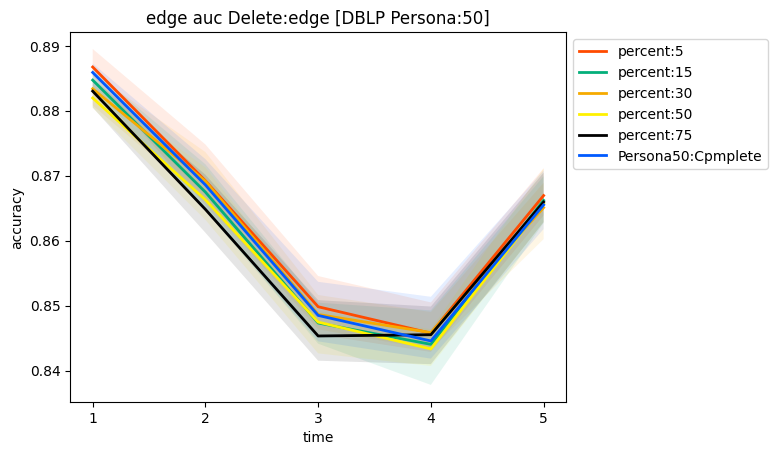

In [67]:
change_percent("DBLP","edge","edge")

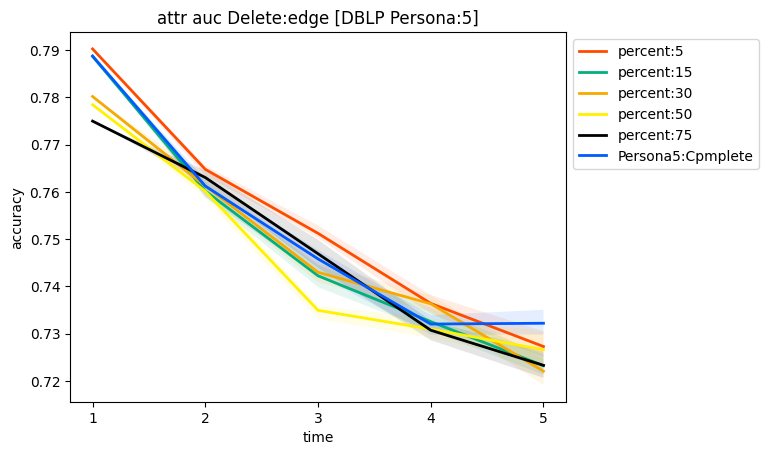

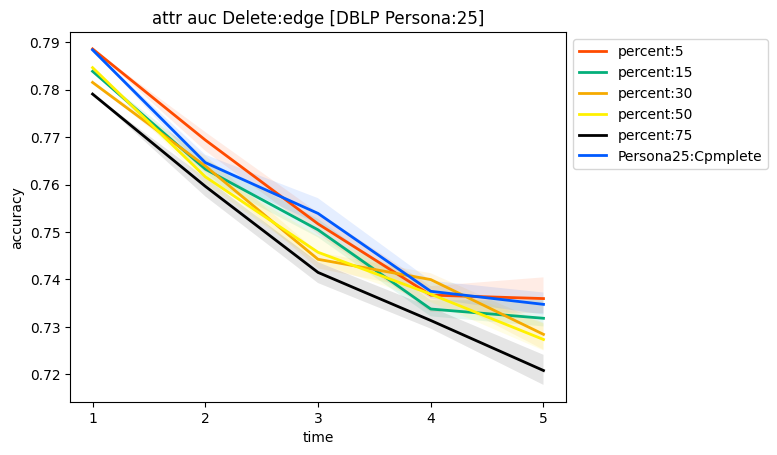

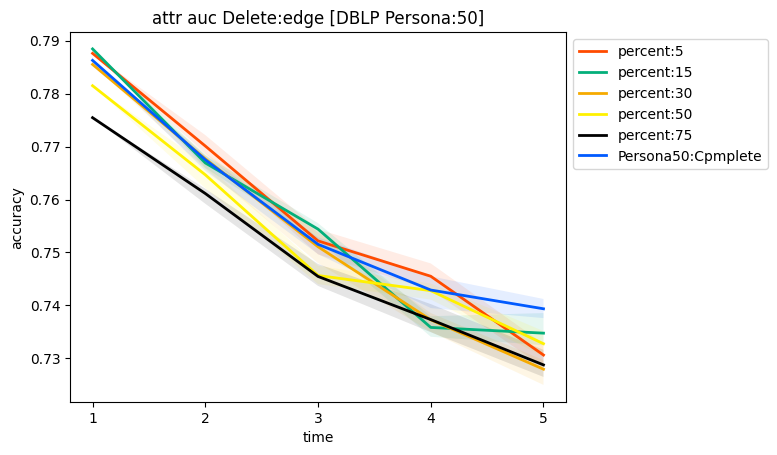

In [68]:
change_percent("DBLP","edge","attr")

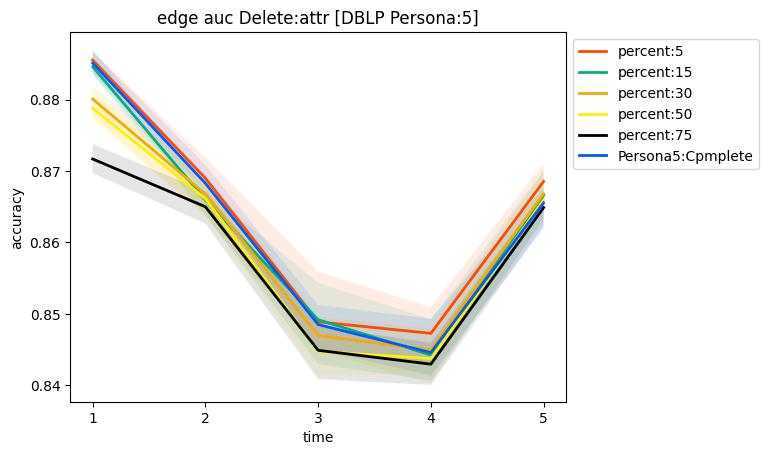

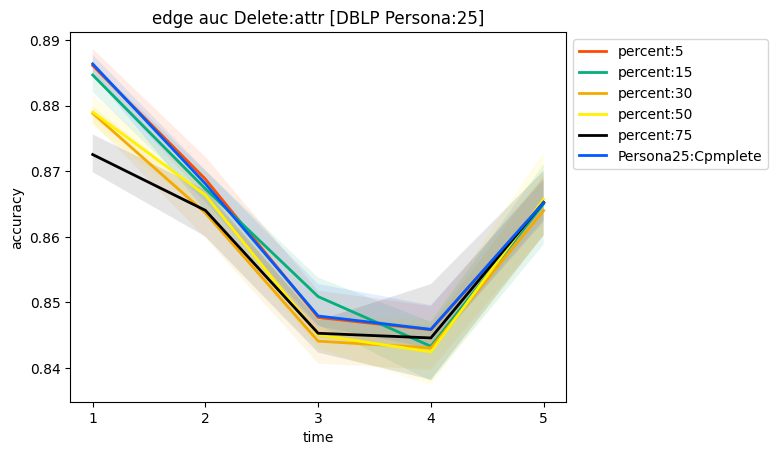

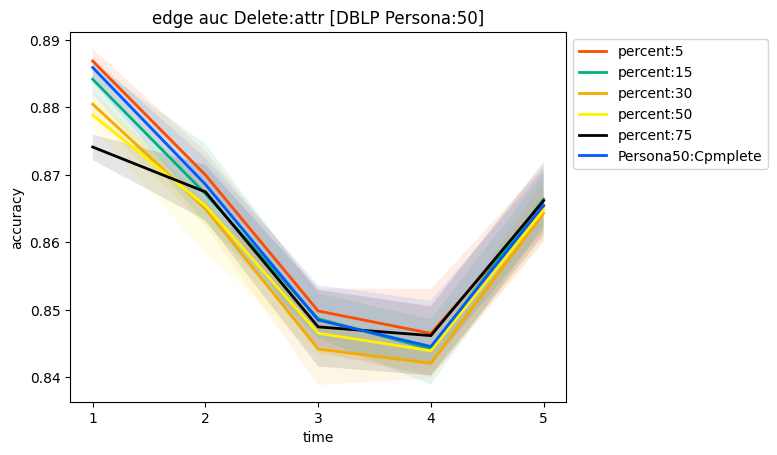

In [69]:
change_percent("DBLP","attr","edge")

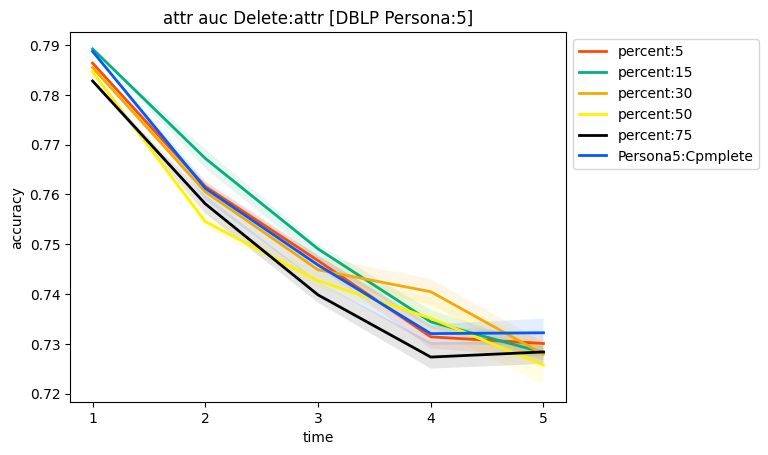

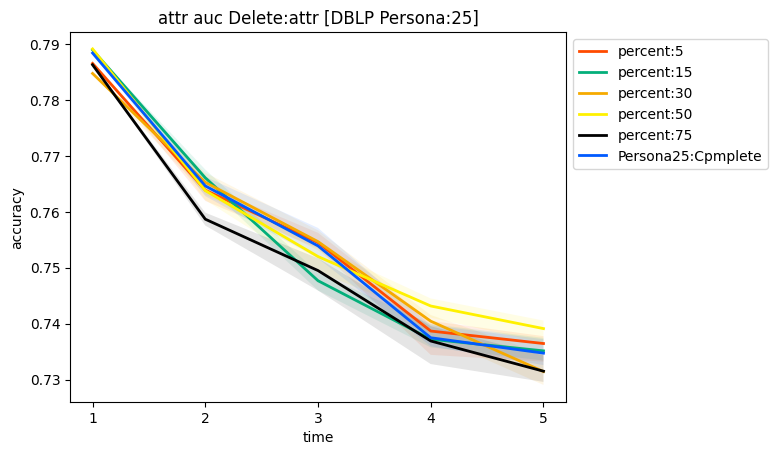

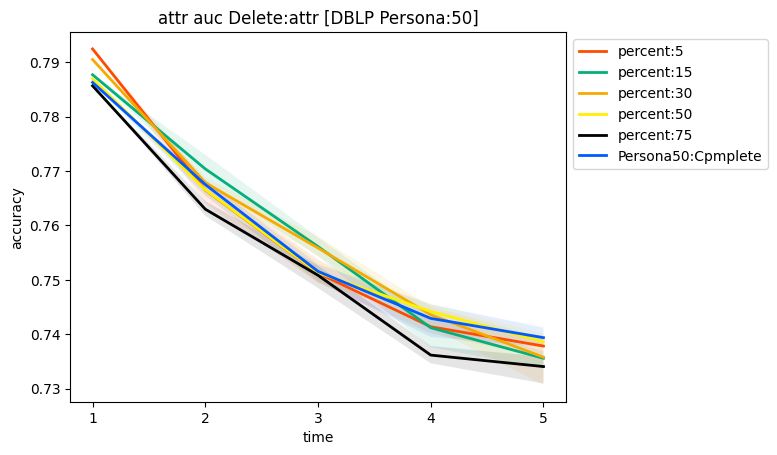

In [70]:
change_percent("DBLP","attr","attr")